# Explore MNI iEEG Data

Notes:
- for data loading, I also tried loading with neo / pyedf, but this didn't seem to work...

In [1]:
import os
from pathlib import Path

import mne

# Use neurodsp for convenience
from neurodsp.plts import plot_time_series, plot_power_spectra
from neurodsp.spectral import compute_spectrum

# Import fooof for checking model fits
from fooof import FOOOF

## Data Loading

In [2]:
# Set data path
data_path = Path('/Users/tom/Data/External/iEEG/MNI')

In [3]:
# Set dataset
dataset = 'Wakefulness_AllRegions'

In [4]:
# Get list of files, which correspond to regions
regions = os.listdir(data_path / dataset)

In [5]:
# Check regions
regions[0:5]

['Calcarine cortex_W.edf',
 'Anterior insula_W.edf',
 'Parietal operculum_W.edf',
 'Supplementary motor cortex_W.edf',
 'Inferior temporal gyrus_W.edf']

In [6]:
# Set data file
data_file = data_path / dataset / regions[1]
print(data_file)

/Users/tom/Data/External/iEEG/MNI/Wakefulness_AllRegions/Anterior insula_W.edf


In [7]:
# Load data file
data = mne.io.read_raw_edf(data_file)

Extracting EDF parameters from /Users/tom/Data/External/iEEG/MNI/Wakefulness_AllRegions/Anterior insula_W.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


## Check data files

In [8]:
# Get data information
data_info = data.info

In [9]:
# Get the sampling rate
fs = data_info['sfreq']

In [10]:
# Get the data matrix
rec = data.get_data()

In [11]:
# Check shape - should be [n_channels, n_timepoints]
rec.shape

(71, 13600)

In [12]:
# Set an example channel index to explore
chind = 0

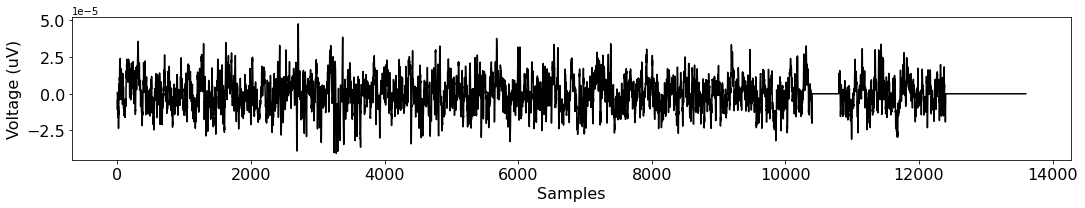

In [13]:
# Plot example time series
plot_time_series(None, rec[chind, :])

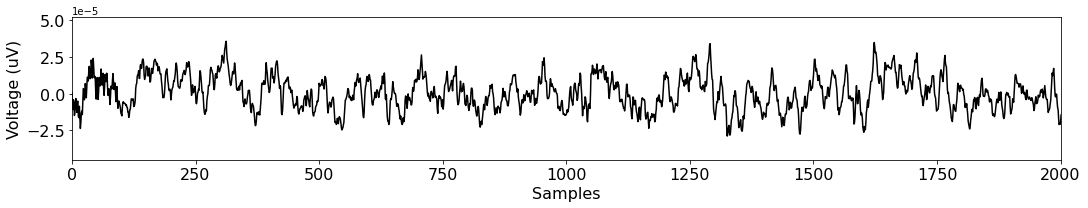

In [14]:
# Check a zoomed in plot - 2000 samples -> 10 seconds
plot_time_series(None, rec[chind, :], xlim=[0, 2000])

In [15]:
# Compute power spectrum of example channel
freqs, powers = compute_spectrum(rec[chind, :], fs)

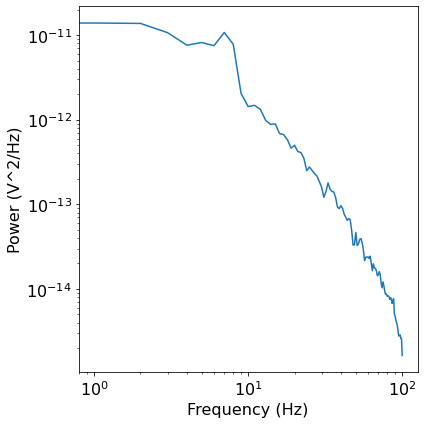

In [16]:
# Plot the power spectrum
plot_power_spectra(freqs, powers)

In [17]:
# Initialize specparam model
fm = FOOOF(aperiodic_mode='knee')

# Fitting settings
freq_range = [1, 45]


FOOOF WARNING: Lower-bound peak width limit is < or ~= the frequency resolution: 1.00 <= 0.50
	Lower bounds below frequency-resolution have no effect (effective lower bound is the frequency resolution).
	Too low a limit may lead to overfitting noise as small bandwidth peaks.
	We recommend a lower bound of approximately 2x the frequency resolution.

                                                                                                  
                                   FOOOF - POWER SPECTRUM MODEL                                   
                                                                                                  
                        The model was run on the frequency range 1 - 45 Hz                        
                                 Frequency Resolution is 1.00 Hz                                  
                                                                                                  
                         Aperiodic Parameters (offset,

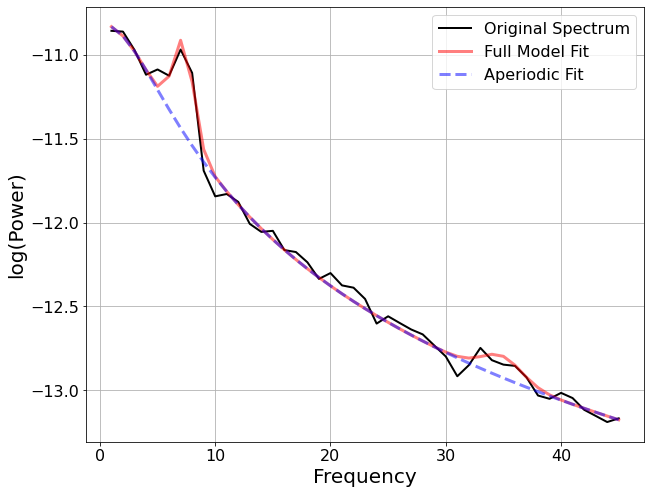

In [18]:
# Fit an example spectral model
fm.report(freqs, powers, freq_range)